<center><h1>Data Augmentation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

<h1 style="color:green">Load flowers dataset</h1>

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, cache_dir = '.', untar= True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

<h1>Image Viewing

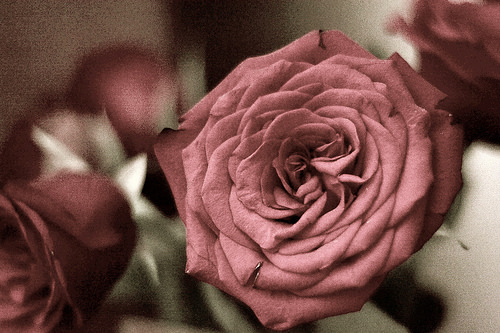

In [8]:
PIL.Image.open(str(roses[12]))

In [9]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

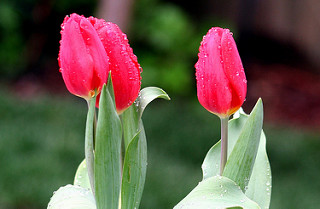

In [10]:
PIL.Image.open(str(tulips[0]))

<h1 style="color:green">Read flowers images from disk into numpy array using opencv</h1>

In [13]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [14]:
flowers_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [15]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [16]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [17]:
img.shape

(240, 179, 3)

In [18]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [19]:
X, y = [], [] 
for flower_name,images in flowers_images_dict.items():
  #  print(flower_name)
  #  print(len(images))

    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [20]:
X

[array([[[ 1, 16,  7],
         [ 1, 16,  7],
         [ 1, 17,  9],
         ...,
         [23, 50, 31],
         [25, 51, 32],
         [26, 52, 33]],
 
        [[10, 23, 15],
         [10, 23, 15],
         [ 9, 22, 14],
         ...,
         [20, 44, 30],
         [23, 47, 33],
         [26, 50, 36]],
 
        [[13, 20, 13],
         [12, 20, 13],
         [11, 19, 12],
         ...,
         [21, 43, 30],
         [22, 45, 31],
         [25, 48, 34]],
 
        ...,
 
        [[12, 24, 18],
         [11, 22, 15],
         [12, 21, 11],
         ...,
         [ 7, 14,  7],
         [ 2,  8,  2],
         [ 0,  2,  0]],
 
        [[19, 30, 28],
         [16, 26, 21],
         [14, 22, 15],
         ...,
         [ 3, 12,  2],
         [ 0,  8,  1],
         [ 0,  6,  1]],
 
        [[11, 21, 20],
         [17, 25, 24],
         [21, 28, 23],
         ...,
         [ 1, 12,  2],
         [ 2, 10,  3],
         [ 3, 10,  4]]], dtype=uint8),
 array([[[13, 18, 17],
         [11, 13, 1

In [21]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [22]:
y[:5]

[0, 0, 0, 0, 0]

In [23]:
X = np.array(X)
y = np.array(y)

In [24]:
X

array([[[[  1,  16,   7],
         [  1,  16,   7],
         [  1,  17,   9],
         ...,
         [ 23,  50,  31],
         [ 25,  51,  32],
         [ 26,  52,  33]],

        [[ 10,  23,  15],
         [ 10,  23,  15],
         [  9,  22,  14],
         ...,
         [ 20,  44,  30],
         [ 23,  47,  33],
         [ 26,  50,  36]],

        [[ 13,  20,  13],
         [ 12,  20,  13],
         [ 11,  19,  12],
         ...,
         [ 21,  43,  30],
         [ 22,  45,  31],
         [ 25,  48,  34]],

        ...,

        [[ 12,  24,  18],
         [ 11,  22,  15],
         [ 12,  21,  11],
         ...,
         [  7,  14,   7],
         [  2,   8,   2],
         [  0,   2,   0]],

        [[ 19,  30,  28],
         [ 16,  26,  21],
         [ 14,  22,  15],
         ...,
         [  3,  12,   2],
         [  0,   8,   1],
         [  0,   6,   1]],

        [[ 11,  21,  20],
         [ 17,  25,  24],
         [ 21,  28,  23],
         ...,
         [  1,  12,   2],
        

In [25]:
y

array([0, 0, 0, ..., 4, 4, 4])

<h1>Test Train Split</h1>

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
len(X_train)

2752

In [28]:
len(X_test)

918

In [29]:
X_train

array([[[[ 68,  79,  77],
         [ 63,  70,  63],
         [ 60,  62,  56],
         ...,
         [ 49,  40,  37],
         [ 48,  39,  36],
         [ 48,  39,  36]],

        [[ 57,  62,  60],
         [ 61,  64,  60],
         [ 60,  61,  55],
         ...,
         [ 48,  39,  36],
         [ 48,  39,  36],
         [ 50,  41,  38]],

        [[ 61,  58,  57],
         [ 64,  64,  59],
         [ 59,  59,  53],
         ...,
         [ 49,  40,  37],
         [ 49,  40,  37],
         [ 50,  41,  38]],

        ...,

        [[ 49, 121,  93],
         [ 40,  65,  51],
         [ 52,  96,  67],
         ...,
         [156, 216, 211],
         [161, 216, 212],
         [169, 203, 206]],

        [[ 48, 119,  90],
         [ 45,  58,  44],
         [ 50,  91,  60],
         ...,
         [217, 233, 238],
         [201, 212, 215],
         [185, 168, 175]],

        [[ 54, 121,  95],
         [ 46,  58,  46],
         [ 46,  89,  60],
         ...,
         [227, 245, 248],
        

In [30]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [31]:
X_train_scaled

array([[[[0.26666667, 0.30980392, 0.30196078],
         [0.24705882, 0.2745098 , 0.24705882],
         [0.23529412, 0.24313725, 0.21960784],
         ...,
         [0.19215686, 0.15686275, 0.14509804],
         [0.18823529, 0.15294118, 0.14117647],
         [0.18823529, 0.15294118, 0.14117647]],

        [[0.22352941, 0.24313725, 0.23529412],
         [0.23921569, 0.25098039, 0.23529412],
         [0.23529412, 0.23921569, 0.21568627],
         ...,
         [0.18823529, 0.15294118, 0.14117647],
         [0.18823529, 0.15294118, 0.14117647],
         [0.19607843, 0.16078431, 0.14901961]],

        [[0.23921569, 0.22745098, 0.22352941],
         [0.25098039, 0.25098039, 0.23137255],
         [0.23137255, 0.23137255, 0.20784314],
         ...,
         [0.19215686, 0.15686275, 0.14509804],
         [0.19215686, 0.15686275, 0.14509804],
         [0.19607843, 0.16078431, 0.14901961]],

        ...,

        [[0.19215686, 0.4745098 , 0.36470588],
         [0.15686275, 0.25490196, 0.2       ]

<h1>Build convolutional neural network

In [32]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16,3,padding='same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=20)       

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 315ms/step - accuracy: 0.2901 - loss: 1.8772
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 245ms/step - accuracy: 0.5653 - loss: 1.0432
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 242ms/step - accuracy: 0.6607 - loss: 0.9107
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 240ms/step - accuracy: 0.7251 - loss: 0.7196
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 243ms/step - accuracy: 0.7970 - loss: 0.5599
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 250ms/step - accuracy: 0.8824 - loss: 0.3423
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 241ms/step - accuracy: 0.9374 - loss: 0.2043
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 245ms/step - accuracy: 0.9581 - loss: 0.1277
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 243ms/step - accuracy: 0.9867 - loss: 0.0670
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 240ms/step - accuracy: 0.9779 - loss: 0.0874
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 249ms/step - accuracy: 0.9884 - loss: 0.0472
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 21

In [33]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.6427 - loss: 2.4697


[2.4793684482574463, 0.6470588445663452]

<b>Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (64.27%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [34]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step


array([[ 13.22516   ,  24.280254  ,  -0.07765515,  -9.228521  ,
         -4.8819776 ],
       [ 12.109057  ,   1.5774832 ,  -4.6500206 ,  -3.992127  ,
          5.773001  ],
       [  0.8619869 ,   3.5843005 ,  17.547104  , -11.422076  ,
          3.238346  ],
       ...,
       [ -3.974599  ,  -6.240432  ,  -9.402469  ,   8.937339  ,
          9.427922  ],
       [  8.201175  ,  -4.906133  ,   6.857035  ,  -6.812937  ,
          3.866119  ],
       [ -0.50292194, -11.225122  ,   0.97206956,  10.2451315 ,
          5.324159  ]], dtype=float32)

In [35]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.5806163e-05, 9.9998415e-01, 2.6392903e-11, 2.8010289e-15,
       2.1627033e-13], dtype=float32)>

In [36]:
np.argmax(score)

1

In [37]:
y_test[0]

1

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [12]:
flowers_images_dict['daisy']

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

<h1 style="color:blue">Data Augmentation</h1>

In [38]:
data_augmentation1 = keras.Sequential(
  [  
    
    layers.RandomZoom(0.3)
  ]
)

<b>Original Image

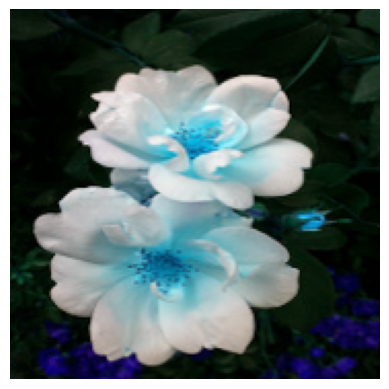

In [39]:
plt.axis('off')
plt.imshow(X[0])

In [40]:
data_augmentation1(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[ 1.2596653 ,  5.76951   ,  0.7695097 ],
        [ 0.7671174 ,  4.573148  ,  0.10641234],
        [ 1.7659297 ,  6.055235  ,  1.0452837 ],
        ...,
        [19.173004  , 35.911316  , 22.911316  ],
        [18.731651  , 35.091972  , 21.091974  ],
        [18.45805   , 34.45805   , 20.458052  ]],

       [[ 2.3669114 ,  8.200558  ,  3.2005582 ],
        [ 2.5286138 ,  7.528614  ,  2.6672935 ],
        [ 2.676482  ,  8.510129  ,  3.5101287 ],
        ...,
        [18.4208    , 33.614773  , 19.781124  ],
        [24.305336  , 39.33301   , 25.333012  ],
        [28.636848  , 42.909615  , 28.909615  ]],

       [[ 0.74019563,  7.823048  ,  2.702627  ],
        [ 1.1795394 ,  9.049992  ,  3.1288989 ],
        [ 3.1672301 , 11.24932   ,  3.1933222 ],
        ...,
        [17.108187  , 33.10971   , 18.081331  ],
        [13.180186  , 27.88429   , 13.884289  ],
        [15.676712  , 28.749613  , 14.749613  ]],

       ...,

     

<b>Transformation Image

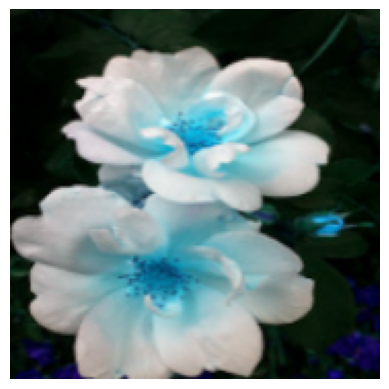

In [41]:
plt.axis('off')
plt.imshow(data_augmentation1(X)[0].numpy().astype("uint8"))

In [42]:
data_augmentation2 = keras.Sequential(
  [  
    
    layers.RandomRotation(0.1)
  ]
)

<b>Original Image

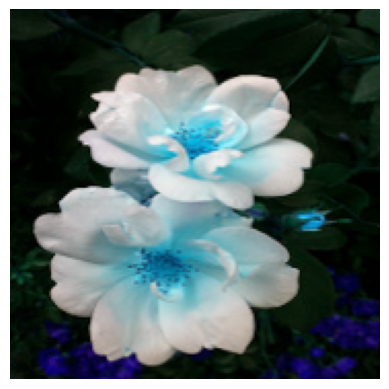

In [43]:
plt.axis('off')
plt.imshow(X[0])

<b>Transformation Image

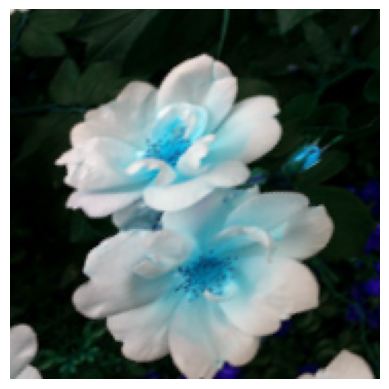

In [44]:
plt.axis('off')
plt.imshow(data_augmentation2(X)[0].numpy().astype("uint8"))

<h1 style="color:green">Improve Test Accuracy Using Data Augmentation

In [45]:
img_height = 180
img_width = 180
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<h1>Train the model using data augmentation and a drop out layer

In [46]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=20)    

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 299ms/step - accuracy: 0.3956 - loss: 1.3778
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 295ms/step - accuracy: 0.5772 - loss: 1.0607
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 303ms/step - accuracy: 0.6283 - loss: 0.9507
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 297ms/step - accuracy: 0.6634 - loss: 0.8802
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 295ms/step - accuracy: 0.7017 - loss: 0.7995
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 291ms/step - accuracy: 0.7067 - loss: 0.7531
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 293ms/step - accuracy: 0.7326 - loss: 0.7012
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 296ms/step - accuracy: 0.7311 - loss: 0.7159
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 294ms/step - accuracy: 0.7336 - loss: 0.6748
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 297ms/step - accuracy: 0.7573 - loss: 0.6404
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 307ms/step - accuracy: 0.7618 - loss: 0.6243
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 26

In [47]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.7357 - loss: 0.7800


[0.7619137763977051, 0.7505446672439575]

<b>You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.57%